In [ ]:
# 数据可视化
import torch
from utils.dao import db_utils as db
import pandas as pd

# 从文件加载 tensor
t = torch.load("res/all_sim.pt")
for i in range(len(t)):
    for j in range(i):
        t[i][j] = t[j][i]
all_col = db.get_all_name_en()
pd = pd.DataFrame(t.numpy(), columns=all_col, index=all_col)
pd.to_csv("res/all_sim.csv")


In [4]:
import torch
from utils.dao import db_utils as db
import pandas as pd

author_set = db.get_all_name_en()
d50 = torch.load('res/author_vec_set.pt')
d2 = torch.load("res/author_vec_set_2d.pt")
print(type(d2))
print(d2.shape)
print(d2)
# pd.DataFrame(d50.numpy(), index=author_set).to_csv("res/author_vec_set.csv")
# pd.DataFrame(d2, index=author_set).to_csv("res/author_vec_set_2d.csv")

<class 'numpy.ndarray'>
(126, 2)
[[-4.164996   -2.965808  ]
 [-4.361517   -1.4412076 ]
 [ 4.9059744  -2.4302235 ]
 [ 2.7383106  -3.995165  ]
 [-5.3575583  -0.03111854]
 [ 1.2801486  -3.2186227 ]
 [ 0.13651375 -3.1813037 ]
 [-8.581895   -2.5347993 ]
 [ 3.0231712  -2.224347  ]
 [ 4.8092833  -2.126777  ]
 [-7.776188   -3.1772842 ]
 [ 2.0505004  -2.4234376 ]
 [ 5.4235134  -3.2017896 ]
 [-4.8673058   1.2261138 ]
 [-3.5743735   0.8117135 ]
 [ 2.9927201  -2.6456258 ]
 [-2.1734514  -0.799847  ]
 [ 0.64365274 -3.587816  ]
 [-3.8780284  -2.6623673 ]
 [ 9.033603   -0.37900585]
 [ 5.4451137  -2.8627841 ]
 [ 5.2747326  -1.3388108 ]
 [ 3.344943   -3.2073805 ]
 [ 7.131132   -1.3906095 ]
 [ 8.299241   -0.78378505]
 [-3.4827657   1.858337  ]
 [-7.1684875   1.4352753 ]
 [-0.4089963   0.43047017]
 [-1.3546884   2.1436777 ]
 [-1.997992   -0.21246114]
 [ 0.8022773  -3.4046488 ]
 [-2.3477569  -3.7054212 ]
 [-6.7234282  -1.0917428 ]
 [ 4.918394   -1.9829019 ]
 [ 5.5084805  -2.1902733 ]
 [-3.072908   -0.79842

In [6]:

from sklearn.datasets import make_blobs

centers = [[20, 1], [-2, -1], [2, -1]]  # 三个中心点的坐标
# datas为样本数据集，labels_true为样本数据集的标签
datas, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                                random_state=0)
print(type(datas))
print(datas.shape)
print(datas)

<class 'numpy.ndarray'>
(750, 2)
[[19.84022039  1.14802236]
 [-2.15474834 -1.2041171 ]
 [19.67863613  0.72418009]
 ...
 [ 1.26798858 -1.27833405]
 [-1.88628813 -0.30293249]
 [ 1.60046048 -1.29605472]]


labs of my dbscan
[1, 2, 2, -1, 5, 2, 2, 3, 2, 2, -1, 2, -1, -1, -1, 2, 2, 2, 1, 4, 2, 2, 2, 4, 4, -1, -1, -1, -1, 2, 2, 1, 5, 2, 2, 2, 5, 2, -1, -1, -1, 2, 2, 2, -1, 2, 2, 2, 1, 4, -1, 4, -1, 2, -1, 1, -1, 4, -1, 5, 1, -1, 1, -1, 3, 1, 2, -1, 2, -1, 1, 2, -1, 2, 2, -1, 2, 5, 2, 5, -1, -1, -1, 2, -1, 5, -1, -1, 2, 2, 4, 3, 1, 4, -1, 5, 2, 5, 2, 2, 2, 4, 2, -1, 1, 5, -1, 2, 1, 1, -1, 2, 2, -1, 5, 5, 2, -1, 3, -1, 2, 1, 4, 3, 2, 4]
labs of sk-DBSCAN
[ 0  1  1 -1  4  1  1  2  1  1 -1  1 -1 -1 -1  1  1  1  0  3  1  1  1  3
  3 -1 -1 -1 -1  1  1  0  4  1  1  1  4  1 -1 -1 -1  1  1  1 -1  1  1  1
  0  3 -1  3 -1  1 -1  0 -1  3 -1  4  0 -1  0 -1  2  0  1 -1  1 -1  0  1
 -1  1  1 -1  1  4  1  4 -1 -1 -1  1 -1  4 -1 -1  1  1  3  2  0  3 -1  4
  1  4  1  1  1  3  1 -1  0  4 -1  1  0  0 -1  1  1 -1  4  4  1 -1  2 -1
  1  0  3  2  1  3]


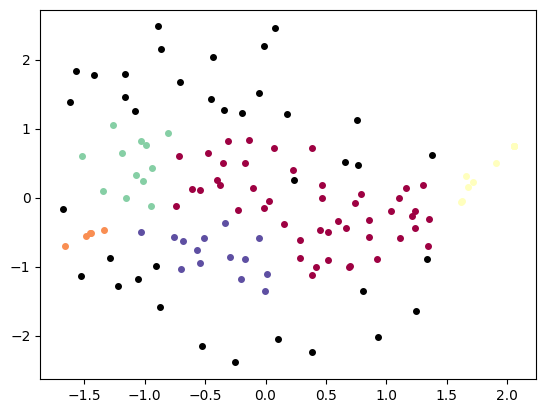

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

UNCLASSIFIED = 0  # 点未被标记
NOISE = -1  # 噪声点标记


# 计算数据点两两之间的距离
def getDistanceMatrix(datas):  # datas 是聚类数据
    N, D = np.shape(datas)  # 读取datas的维度，维度是N x D（N指数据个数，D指特征维度）   ，shape函数用于获取矩阵的形状
    dists = np.zeros([N, N])  # zeros 函数：返回一个给定形状和类型的用0填充的数组，

    for i in range(N):
        for j in range(N):
            vi = datas[i, :]  # 切片 [开始,结束]
            vj = datas[j, :]
            dists[i, j] = np.sqrt(np.dot((vi - vj), (vi - vj)))  # 欧式距离函数,返回点与点之间距离的数组
    return dists


#  寻找以点cluster_id 为中心，eps 为半径的圆内的所有点的id
def find_points_in_eps(point_id, eps, dists):
    index = dists[point_id] <= eps  # dists[point_id] 即：point_id 与 所有点的距离
    return np.where(index)[0].tolist()  # 返回所有符合的点的集合


# 聚类扩展
# dists ： 任意数据两两之间的距离  N x N
# labs :   所有数据的标签 labs N，
# cluster_id ： 一个簇的标号
# eps ： 密度评估半径
# seeds： 用来进行簇扩展的点
# min_points： 半径内最少的点数
def expand_cluster(dists, labs, cluster_id, seeds, eps, min_points):
    i = 0
    while i < len(seeds):
        Pn = seeds[i]  # 获取一个点
        if labs[Pn] == NOISE:  # 如果是噪声点，则重新标记
            labs[Pn] = cluster_id
        elif labs[Pn] == UNCLASSIFIED:  # 如果未被标记过，则进行标记
            labs[Pn] = cluster_id
            new_seeds = find_points_in_eps(Pn, eps, dists)  # 以新点为圆心再画圈，进行扩展
            if len(new_seeds) >= min_points:  # 如果扩张的圈中数够多，则加入到seeds队列中
                seeds = seeds + new_seeds
        i += 1
        # 通过挨个标记和扩展seeds里的数字，实现聚类过程


def dbscan(datas, eps, min_points):
    dists = getDistanceMatrix(datas)  # 获取点与点之间的距离，且以二维数组的形式
    # 将所有点的标签初始化为0
    n_points = datas.shape[0]  # shape[0]指读取读取矩阵第一维的长度
    labs = [UNCLASSIFIED] * n_points

    cluster_id = 0
    # 遍历所有点
    for point_id in range(n_points):
        if labs[point_id] != UNCLASSIFIED:  # 如果被标记，则结束此次循环，表示该点已处理过
            continue  # 没有处理过，则计算寻找临近点
        seeds = find_points_in_eps(point_id, eps, dists)  # 符合条件的点存到seeds中

        if len(seeds) < min_points:  # 如果临近点过少，则标记为噪声点
            labs[point_id] = NOISE
        else:  # 否则开启新一轮扩张
            cluster_id = cluster_id + 1
            labs[point_id] = cluster_id  # 标记当前点
            expand_cluster(dists, labs, cluster_id, seeds, eps, min_points)
    return labs, cluster_id


# 绘图
# 数据  聚类结果  聚类个数
def draw_cluster(datas, labs, n_cluster):
    plt.cla()
    # 设计颜色
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, n_cluster)]  # (起点，终点，几个元素)

    # 遍历所有点的坐标
    for i, lab in enumerate(labs):
        if lab == NOISE:  # 如果是噪声点 则为黑色
            plt.scatter(datas[i, 0], datas[i, 1], s=16., color=(0, 0, 0))
        else:  # 否则，根据类别的编号，来标记颜色
            plt.scatter(datas[i, 0], datas[i, 1], s=16., color=colors[lab - 1])
    plt.show()


if __name__ == "__main__":
    ## 数据1
    # centers = [[20, 1], [-2, -1], [2, -1]]  # 三个中心点的坐标
    # # datas为样本数据集，labels_true为样本数据集的标签
    # datas, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
    #                                 random_state=0)
    # 产生一组随机数datas，中心点是centers，方差是0.4，产生750个点

    ## 数据2
    # file_name = "spiral"
    # with open(file_name+".txt","r",encoding="utf-8") as f:
    #    lines = f.read().splitlines()
    # lines = [line.split("\t")[:-1] for line in lines]
    # datas = np.array(lines).astype(np.float32)
    ###
    datas = torch.load("res/author_vec_set_2d.pt")

    # 数据正则化，让参与的数据减去均值出方差，是临均值，标准差成了1
    datas = StandardScaler().fit_transform(datas)  # 计算训练数据的均值和方差，并基于计算出来的均值和方差来转换训练数据，从而把数据转换成标准的正态分布
    eps = 0.35
    min_points = 5
    # 手动实现DBSCAN
    # dbscan算法，labs是最终结果，cluster_id是分成了多少类
    labs, cluster_id = dbscan(datas, eps=eps, min_points=min_points)
    print("labs of my dbscan")
    print(labs)

    # sklearn里的DBSCAN 算法
    # 分类器     # 半径      min_points           对datas进行聚类
    db = DBSCAN(eps=eps, min_samples=min_points).fit(datas)
    skl_labels = db.labels_
    print("labs of sk-DBSCAN")
    print(skl_labels)
    # 画出
    draw_cluster(datas, skl_labels, cluster_id)

    # dbscan 输出，123表示聚类点，-1表示噪声点
    # sklearn 输出  012表示聚类点，-1表示噪声点

